In [6]:
'''
一維數據資料
'''
from matplotlib import pyplot as plt
from collections import defaultdict, Counter
import math

def bucketize(point, bucket_size):
    '''
    以 floor 以下取整數，做為 bucket_size 的倍數
    '''
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    '''
    對資料點進行分組，並計算每個分組各有幾個資料點
    '''
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()       # 畫出圖形

In [9]:
# 使用兩組數據
import random

random.seed(0)

# 介於 -100 和 100 之間的均勻分布
uniform = [ 200 * random.random() - 100 for _ in range(10000)]
print("uniform :", uniform)

uniform : [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235, 81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653, -37.970486136133474, 45.96634965202574, 79.7676575935987, 36.79678638308826, -5.571456909457325, -79.85975838632683, -13.165632909243257, 22.177394688760316, 82.60221064757965, 93.32127355415176, -4.5980446894566, 73.061985554328, -47.90153792160812, 61.005565402604475, 9.739860767117861, -97.19165996719622, 43.94093728079082, -20.235291555146247, 64.96899542964661, 33.63064024637018, -99.77143613711435, -1.284426706935065, 73.52055509855617, -51.2178246225736, -34.95912745052199, 74.09424642173093, -61.78658169952189, 13.50214812413438, -52.27681427695596, 93.50805005802866, 60.63589385597

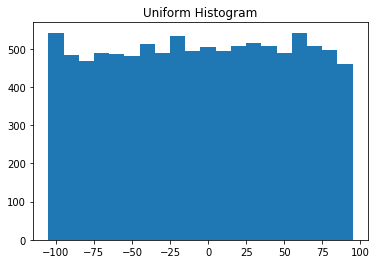

In [12]:
# 均勻分布圖形
plot_histogram(uniform, 10, "Uniform Histogram")

In [14]:
##############################################

# 之前定義的函式
import math

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    '''
    用二元搜尋法逆向求出近似值
    '''
    # 如果不是標準常態分佈，就先轉換成標轉常態分佈
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance = tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p   = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            # 中點的值還太低，就往上繼續搜尋
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # 中點的值還太高，就往下繼續搜尋
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
        return mid_z

def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2


def dot(v, w):
    return sum(v_i * w_i
              for v_i, w_i in zip(v,w))

def sum_of_squares(v):
    return dot(v, v)

# 平均數 (mean)
def mean(x):
    return sum(x) / len(x)

# 變異數 (variance)
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / ( n - 1)

# 標準差 (standard deviation)
def standard_deviation(x):
    return math.sqrt(variance(x))

# 相關係數 (correlation)
def correlation(x,y):
      stdev_x = standard_deviation(x)
      stdev_y = standard_deviation(y)
      if stdev_x > 0 and stdev_y > 0 :
          return covariance(x, y) / stdev_x / stdev_y
      else:
          return 0 

##############################################

In [16]:
import random

random.seed(0)

# 平均值 0、標準差 57的常態分佈
normal = [ 57 * random.random() for _ in range(10000)]
# normal = [ 57 * random.random() * inverse_normal_cdf(random.random())
#          for _ in range(10000
print("normal :", normal)

normal : [48.13204553692774, 43.20340096759724, 23.972580107358166, 14.758254766698911, 29.142659118010684, 23.081245834673613, 44.67651957498204, 17.288825386498864, 27.16602638668428, 33.252776248936776, 51.7624344561341, 28.767150781591244, 16.064757130783118, 43.08083963696176, 35.247032810493906, 14.278861457659112, 51.855536590189686, 56.018772134146225, 46.18238245180561, 51.423459175056216, 17.67841145120196, 41.60040965082733, 51.23378241417563, 38.98708411918015, 26.91213478080466, 5.739968859896851, 24.74779462086567, 34.82055748629669, 52.0416300345602, 55.096562962933255, 27.18955726350487, 49.322665882983486, 14.848061692341687, 45.88658613974227, 31.275860318628588, 0.8003769093490805, 41.02316712502539, 22.732941906783317, 47.01616369744928, 38.0847324702155, 0.06514070092241186, 28.133938388523504, 49.45335820308851, 13.902919982566523, 18.536648676601235, 49.61686023019331, 10.890824215636261, 32.34811221537829, 13.601107931067551, 55.14979426653817, 45.78122974895259

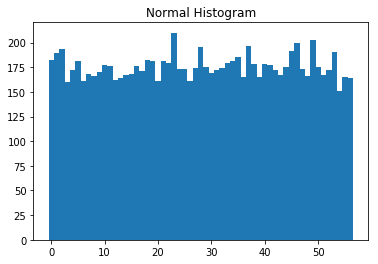

In [19]:
# 常態分佈圖形
plot_histogram(normal, 1, "Normal Histogram")

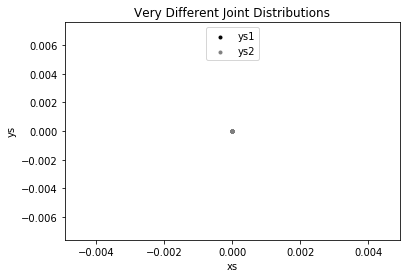

0


In [25]:
'''
二維
'''
from matplotlib import pyplot as plt
import random

random.seed(0)

def random_normal():
    '''
    送回一個從標準常態分佈中隨機選取的數字
    '''
    return inverse_normal_cdf(random.random())

xs = [random_normal() * random.random() for _ in range(1000)]
ys1 = [  x + random_normal() / 2 for x in xs]
ys2 = [ -x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

print(correlation(xs, ys1))

In [34]:
'''
多維
    相關矩陣 (correlation matrix)
'''
def correlation_matrix(data):
    '''
    送回 [ 維數 x 維數 ] 矩陣，其中 (i, j) 項目
    代表的是第 i 維與第 j 維數據的相關性
    '''
    
    _, num_columns = shape(data)
    
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)

In [43]:
# 散點圖矩陣
# 使用 plt.subplots()
import matplotlib.pyplot as plt
from linear_algebra import shape, get_row, get_column, make_matrix, \
    vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply

_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)   # 圖形 figure, 軸 axes

for i in range(num_columns):
    for j in range(num_columns):
        
        # 散點圖 : column_j 在 x 軸，column_i 在 y 軸
        if i != j : ax[i][j].scatter(get_column(data, j), get_column(data, i))
            
        # 如果 i == j ，就顯示序列名稱
        else: ax[x][j].annotate("series " + str(i), (0.5, 0.5),
                               xycoords='axes fraction',
                               ha="center", va="center")
            
        # 除了左邊和下面的圖形之外，隱藏軸上的標籤
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
            
# 修正左上和右下方的圖形軸標籤
# 只有文字在裡面
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

ModuleNotFoundError: No module named 'linear_algebra'

In [56]:
'''
清理與轉換
'''
# 建立一個函式把 csv.reader 封裝起來

def parse_row(input_row, parsers):
    '''
    給定一個解析器列表 (有些可能是None)
    再將適當的解析器，應用到 input_row 中的每個元素
    '''
    return [parse(value) if parser is not None else value
           for value, parser in zip(input_row, parsers)]

def parse_rows_with(reader, parser):
    '''
    把 reader 封裝起來，以便將解析器運用到每一列的數據
    '''
    for row in reader:
        yield parse_row(row, parsers)
        
def try_or_none(f):
    '''
    把 f 封裝起來，若出現例外狀況，就送回 None
    假設 f 只接受一個輸入
    '''
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
           for value, parser in zip(input_row, parsers)]

def try_parse_field(field_name, value, parser_dict):
    """try to parse value using the appropriate function from parser_dict"""
    parser = parser_dict.get(field_name) # None if no such entry
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value

def parse_dict(input_dict, parser_dict):
    return { field_name : try_parse_field(field_name, value, parser_dict)
             for field_name, value in input_dict.items() }

In [63]:
# 讀取與解析資料
import dateutil.parser
import csv

date = []

with open("comma_delimited_stock_prices.csv", "rb") as f:
    reader = csv.reader(f)
    for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)
        
# check rows of None
for row in data:
    if any(x is None for x in row):
        print("row :", row)

Error: iterator should return strings, not bytes (did you open the file in text mode?)

In [68]:
'''
處理數據資料
'''
from collections import Counter, defaultdict
import datetime

data = [
    {'closing_price': 102.06,
    'date': datetime.datetime(2014, 8, 29, 0, 0),
    'symbol': 'APPL'}
]

print("stocks")
with open("stocks.txt", "r", encoding='utf8', newline='') as f:
    reader = csv.DictReader(f, delimiter="\t")
    data = [parse_dict(row, { 'date' : dateutil.parser.parse,
                              'closing_price' : float })
            for row in reader]

# 假設想知道 AAPL的最高收盤價
# 使用解析式列表
max_aapl_price = max(row["closing_price"]
                    for row in data
                    if row['symbol'] == "AAPL")    # symbol 是股票代碼

# 根據股票代碼對各列資料進行分組
by_symbol = defaultdict(list)
for row in data:
    by_symbol[row["symbol"]].append(row)
    
# 運用解析式字典的做法，找出每個股票代碼所對應的最大值
max_price_by_symbol = { symbol : max(row["closing_price"]
                                    for row in grouped_rows)
                      for symbol, grouped_rows in by_symbol.items() }

def picker(field_name):
    '''
    送回一個函式，從一個 dict取出某欄位的值
    '''
    return lambda row : row[field_name]

def pluck(field_name, rows):
    '''
    把一個 dict轉換成某欄位的名稱 (field_name)對應的列表
    '''
    return map(picker(field_name), rows)

# 建立分組器 (grouper) 和 數值轉換函數 (value_transform)
def group_by(grouper, rows, value_transform=None):
    # key 是分組器的輸出值，value 則是各列資料列表
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
        
    if value_transform is None:
        return grouped
    else:
        return { key : value_transform(rows) 
               for key, rows in grouped.items() }

max_price_by_symbol = group_by(picker("symbol"),
                              data,
                              lambda rows: max(pluck("closing_price", rows)))

print("max_price_by_symbol :", max_price_by_symbol)

stocks
max_price_by_symbol : {'AAPL': 119.0, 'MSFT': 49.3, 'FB': 81.45}


In [76]:
'''
變動百分率
    今日價格 / 昨日價格 - 1
'''
def percent_price_change(yesterday, today):
    return today["closing_price"] / yesterday["closing_price"] - 1

def day_over_day_changes(grouped_rows):
    # 根據日期各列進行排序
    ordered = sorted(grouped_rows, key=picker("date"))
    
    # 平移之後進行 zip 壓合，以取得連續兩日的成對資料
    return [{"symbol" : today["symbol"],
            "date" : today["date"],
            "change" : percent_price_change(yesterday, today) }
           for yesterday, today in zip(ordered, ordered[1:])]

# key 是股票代碼，value 是「價格變動」(change) 的 dict list
changes_by_symbol = group_by(picker("symbol"), data, day_over_day_changes)
print("changes_by_symbol :", changes_by_symbol)
print("---------------")

# 將所有「價格變動」(change) dict 中價格變動值，收集到一個大列表中
all_changes = [change
              for changes in changes_by_symbol.values()
              for change in changes]
print("all_changes :", all_changes)

changes_by_symbol :

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [82]:
# 找出最大值
print("max :", max(all_changes, key=picker("change")))
# {'change': 0.3283582089552237,
# 'date' : datetime.datetime(1997, 8, 6, 0, 0),
# 'symbol' : 'AAPL'}

# 找出最小值
print("min :", min(all_changes, key=picker("change")))
# {'change': -0.5193370165745856,
# 'date' : datetime.datetime(2000, 9, 29, 0, 0),
# 'symbol' : 'AAPL'}

max : {'symbol': 'AAPL', 'date': datetime.datetime(1997, 8, 6, 0, 0), 'change': 0.3283582089552237}
min : {'symbol': 'AAPL', 'date': datetime.datetime(2000, 9, 29, 0, 0), 'change': -0.5193370165745856}


In [89]:
'''
使用 all_changes 找出科技股最佳投資月份
    再次做一個合適的數值轉換 (value_transform)
    運用 group_by
'''
# 結合變動百分率，先對每個值加 1，相乘後在減 1
'''
例如 +10% 和 -20%結合
    ( 1 + 10%) * (1 + 20%) - 1 = 1.1 * 0.8 - 1 = -12%
'''
from functools import partial, reduce

def combine_pct_changes(pct_change1, pct_change2):
    return ( 1 + pct_change1) * (1 + pct_change2) - 1

def overall_change(changes):
    return reduce(combine_pct_changes, pluck("change", changes))

overall_change_by_month = group_by(lambda row: row['date'].month,
                                  all_changes,
                                  overall_change)

print("overall_change_by_month :", overall_change_by_month)

overall_change_by_month : {12: 2.2895332950255933, 1: 19.972214514609085, 2: 0.11858483359215, 3: 2.818850048603327, 4: 6.9341967849847626, 5: 1.2555660890321603, 6: -0.5977889232201744, 7: -0.17183091713561482, 8: 6.220055959879489, 9: -0.741162543642831, 10: 21.552541251680015, 11: 3.758572336791725}


In [94]:
'''
改變尺度
'''
'''
  人   身高(英寸)    身高(公分)     體重
 ---------------------------------------
  A     63 英吋      160公分       150磅
  B     67 英吋      170.2公分     160磅
  C     70 英吋      177.8公分     150磅
'''
def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

# 以英吋來衡量距離
a_to_b = distance([63, 150], [67, 160])
a_to_c = distance([63, 150], [70, 171])
b_to_c = distance([67, 160], [70, 171])
print("以英吋來衡量距離")
print("a_to_b : %.2f" % a_to_b, "\n" + "a_to_c : %.2f" % a_to_c, "\n" + "b_to_c : %.2f" % b_to_c)
print("---------------")

# 以公分來衡量距離
a_to_b = distance([160, 150], [170.2, 160])
a_to_c = distance([160, 150], [177.8, 171])
b_to_c = distance([170.2, 160], [177.8, 171])
print("以公分來衡量距離")
print("a_to_b : %.2f" % a_to_b, "\n" + "a_to_c : %.2f" % a_to_c, "\n" + "b_to_c : %.2f" % b_to_c)

以英吋來衡量距離
a_to_b : 10.77 
a_to_c : 22.14 
b_to_c : 11.40
---------------
以公分來衡量距離
a_to_b : 14.28 
a_to_c : 27.53 
b_to_c : 13.37


In [96]:
# 計算每列資料的平均值和標準差
from linear_algebra import shape, get_row, get_column, make_matrix, \
    vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
    
def scale(data_matrix):
    '''
    送回每列資料的平均值和標準差
    '''
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix, j))
            for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix, j))
             for j in range(num_cols)]
    return means, stdevs

ModuleNotFoundError: No module named 'linear_algebra'

In [102]:
'''
降低維度 (reduction dimension)
'''
# from linear_algebra import shape, get_row, get_column, make_matrix, \
#     vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply
    
# 進行數據轉換，讓平均值變為零
def de_mean_matrix(A):
    '''
    送回 A之中每個值減去每列平均值的結果
    使矩陣中的每一列，平均值都是 0
    '''
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])    

# 利用 dot(x, d) 將投影向量轉方向降低維度
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

# 計算在非零向量 w，在整組資料 w 方向上的變異數
def directional_variance_i(x_i, w):
    '''
    x_i 這一列在 w 所決定的方向上的變異數
    '''
    return dot(x_i, direction(w)) ** 2

# 再用梯度遞減的作法
def directional_variance_gradient_i(x_i, w):
    '''
    x_i 這一列數據對於 w 方向變異數梯度的貢獻
    '''
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]

def directional_variance_gradient(x, w):
    return vector_sum(directional_variance_gradient_i(x_i, w)
                     for x_i in x)

In [106]:
'''
第一個主成分
'''
# 方向變異數 (directional_variance)
# 讓函數最大化的方向
def first_principal_component(x):
    guess = [1 for _ in x[0]]
    unscaled_maximizer = maximize_batch(
        partial(directional_variance, X),              # 現在是 w 的函數
        partial(directional_variance_gradient, X),     # 現在是 w 的函數
        guess)
    return direction(unscaled_maximizer)

# 或是用梯度遞減法
# 沒有 "y", 只送進一個裡頭全是 None 的向量
def first_principal_component_sgd(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_stochastic(
        lambda x, _, w: direction_variance_i(x, w),
        X,
        [None for _ in X],    # 假的 "y"
        guess)
    return direction(unscaled_maximizer)

In [109]:
# 找出第一主成分後，找出對應的值
def project(v, w):
    '''
    送回 v 在 w 方向上的投影分量
    '''
    projection_length = dot(v ,w)
    return scalar_multiply(projection_length, w)


# 要找出其他分量
# 先移除在投影上第一主成分的分量
def remove_projection_from_vector(v ,w):
    '''
    用 v 減去 v 投影在 w 上的分量
    '''
    return vector_subtract(v, project(v, w))

def remove_projection(X, w):
    '''
    針對 X 中的每一列
    計算出每一列投影在 w 上的分量，將每一列減去該分量
    '''
    return [remove_projection_from_vector(x_i, w) for x_i, in X]

In [115]:
# 使用迭代方式找出其他分量
def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)
        components.append(component)
        X = remove_projection(X, component)        
    return components

# 轉換到低維度空間之中
def transform_vector(v, components):
    return [dot(v, w) for w in components]

def transform(X, components):
    return [transform_vector(x_i, components) for x_i in X]